# Different Distances of Measure

## Basic Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the IRIS Dataset

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
display(data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Plotting the Data

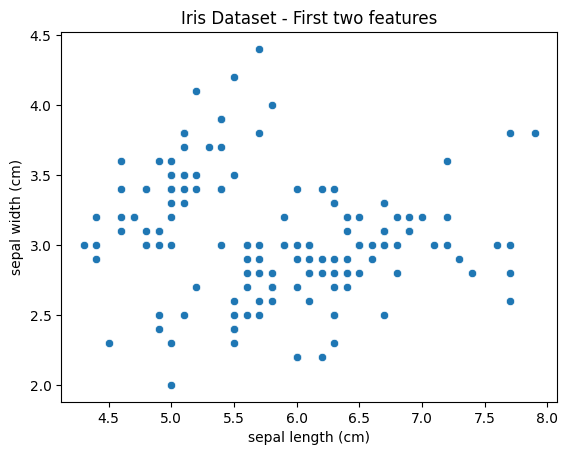

In [28]:
plt.Figure(figsize=(10,6))
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - First two features")
plt.show()

Text(0.5, 1.02, 'Iris Dataset - Pairplot of Features')

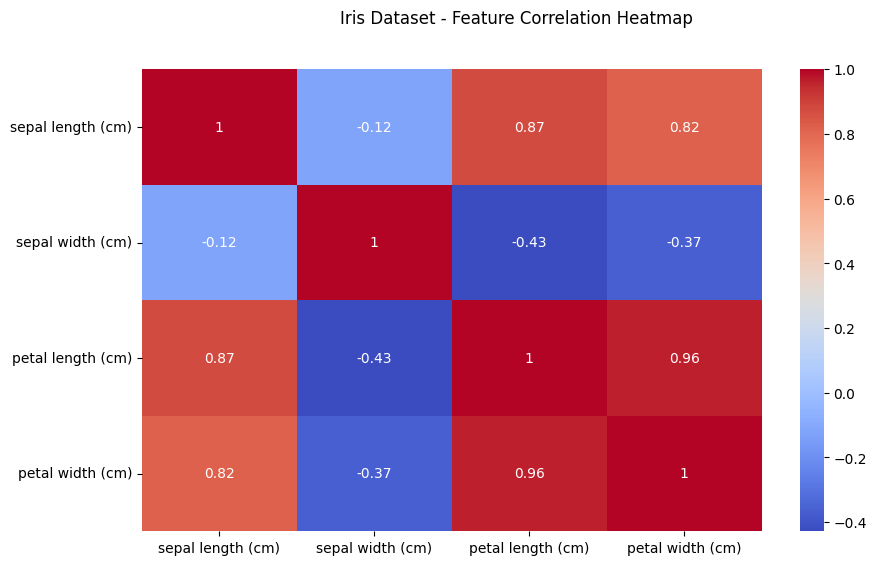

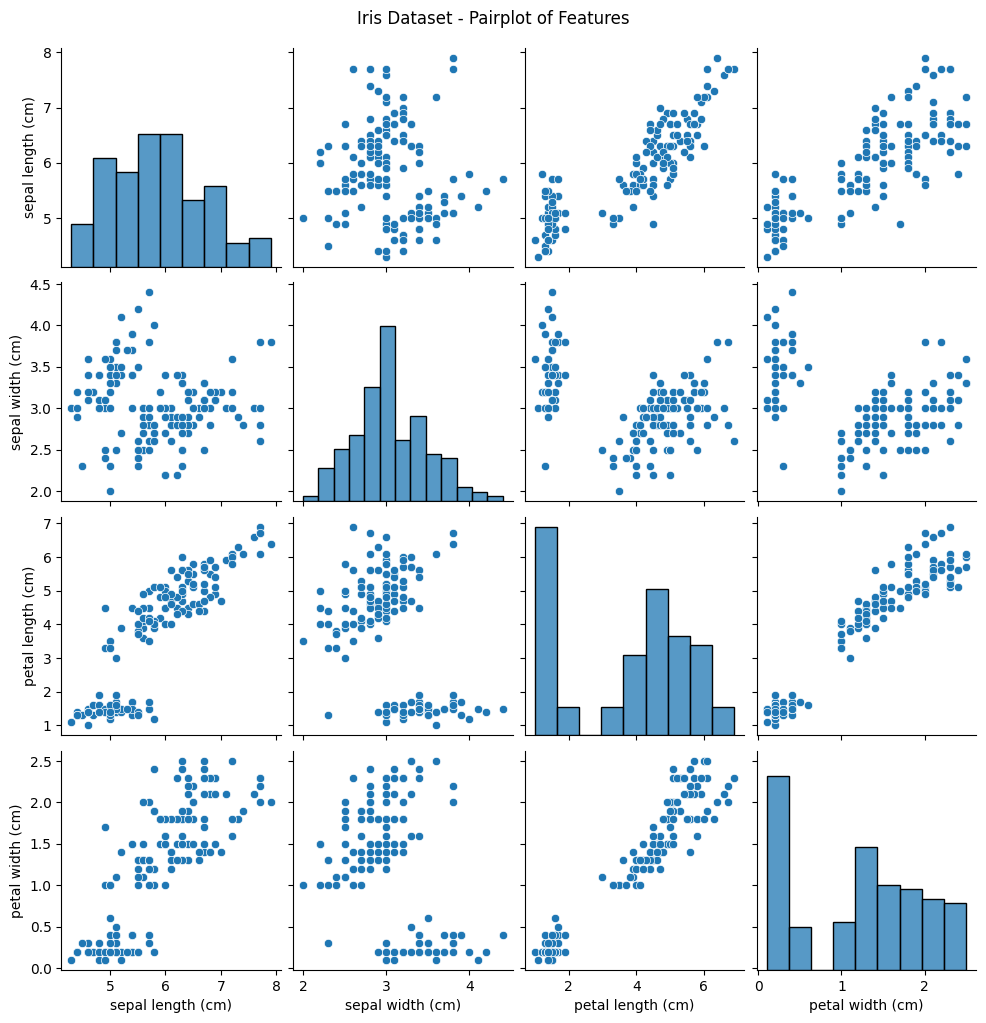

In [29]:
plt.subplots(figsize=(10,6))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.suptitle("Iris Dataset - Feature Correlation Heatmap")
sns.pairplot(data)
plt.suptitle("Iris Dataset - Pairplot of Features", y=1.02)

## Distances

### Euclidean

In [30]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

### Manhattan

In [31]:
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

### Minkowski

In [32]:
from scipy.spatial.distance import minkowski
def minkowski_distance(point1, point2, p):
    return minkowski(point1, point2, p)

### Hamming

In [33]:
def hamming_distance(point1: pd.Series, point2: pd.Series):
    error = 0
    if not len(point1) == len(point2):
        raise ValueError
    
    for i in range(len(point1)):
        if point1.iloc[i] == point2.iloc[i]:
            continue
        else:
            error += 1
    
    return error

## Implementing Definitions

In [34]:
# Finding Euclidean distance between first two samples
dist = euclidean_distance(data.iloc[0].values, data.iloc[1].values)
print(f"Euclidean Distance between first two samples: {dist}")

Euclidean Distance between first two samples: 0.5385164807134502


In [35]:
# Finding Manhattan distance between first two samples
dist_manhattan = manhattan_distance(data.iloc[0].values, data.iloc[1].values)
print(f"Manhattan Distance between first two samples: {dist_manhattan}")

Manhattan Distance between first two samples: 0.6999999999999993


In [36]:
# Finding Minkowski distance between first two samples
p = 4
dist_minkowski = minkowski_distance(data.iloc[0].values, data.iloc[1].values, p)
print(f"Minkowski Distance (p={p}) between first two samples: {dist_minkowski}")

Minkowski Distance (p=4) between first two samples: 0.5031697308299091


In [37]:
# Finding Hamming distance between first two samples
dist_hamming = hamming_distance(data.iloc[0], data.iloc[1])
print(f"Hamming Distance between first two samples: {dist_hamming}")

Hamming Distance between first two samples: 2


## Implementing On a Dataset

In [44]:
data = pd.read_csv("/workspaces/Supervised-Machine-Learning/Datasets/Real estate.csv")
display(data)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Finding Outliers

In [ ]:
from typing import List, Optional, Tuple
def find_outliers(data: pd.DataFrame,
                  column_names: List[str], 
                  threshold: float = 90, 
                  distance_metric = euclidean_distance) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    This function goes through each specified column in the DataFrame, calculates the distance of each point from all other points using the specified distance metric,
    and identifies outliers based on the given threshold percentile.
    
    :param data: Description
    :type data: pd.DataFrame
    :param column_names: Description
    :type column_names: List[str]
    :param threshold: Description
    :type threshold: float
    :param distance_metric: Description
    :type distance_metric: Optional[str]
    :return: Tuple containing a DataFrame of outliers and a DataFrame of distances
    :rtype: Tuple[pd.DataFrame, pd.DataFrame]
    """
    
    distance = pd.DataFrame()
    for i in column_names:
        for j in range(len(data[i])):
            avg_dist = np.mean([distance_metric(data.iloc[j].values, data.iloc[k].values)
                                 for k in range(len(data[i])) if k != j])
            distance.at[j, i] = avg_dist
    
    outliers = pd.DataFrame()
    for i in column_names:
        thresh_value = np.percentile(distance[i], threshold)
        outlier_indices = distance[distance[i] > thresh_value].index
        outliers = pd.concat([outliers, data.iloc[outlier_indices]], ignore_index=True)

    return outliers, distance

In [52]:
outliers, dist = find_outliers(data, column_names=data.columns.tolist(), threshold=99.999, distance_metric=manhattan_distance)
print("Outliers detected:")
display(outliers)
display(dist)

Outliers detected:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
1,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
2,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
3,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
4,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
5,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
6,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
7,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1242.577807,1242.577807,1242.577807,1242.577807,1242.577807,1242.577807,1242.577807,1242.577807
1,1080.488475,1080.488475,1080.488475,1080.488475,1080.488475,1080.488475,1080.488475,1080.488475
2,1039.329615,1039.329615,1039.329615,1039.329615,1039.329615,1039.329615,1039.329615,1039.329615
3,1043.373818,1043.373818,1043.373818,1043.373818,1043.373818,1043.373818,1043.373818,1043.373818
4,1048.891927,1048.891927,1048.891927,1048.891927,1048.891927,1048.891927,1048.891927,1048.891927
...,...,...,...,...,...,...,...,...
409,3313.299517,3313.299517,3313.299517,3313.299517,3313.299517,3313.299517,3313.299517,3313.299517
410,1235.207656,1235.207656,1235.207656,1235.207656,1235.207656,1235.207656,1235.207656,1235.207656
411,1047.010076,1047.010076,1047.010076,1047.010076,1047.010076,1047.010076,1047.010076,1047.010076
412,1221.919592,1221.919592,1221.919592,1221.919592,1221.919592,1221.919592,1221.919592,1221.919592
